Classification of MNIST Dataset using KNN

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
# Load dataset
file_path = '/content/imports_85_data.csv'
df = pd.read_csv(file_path)
df.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_q,column_r,column_s,column_t,column_u,column_v,column_w,column_x,column_y,column_z
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [12]:
# Renaming columns for easier reference
df.columns = ['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
              'num_doors', 'body_style', 'drive_wheels', 'engine_location',
              'wheel_base', 'length', 'width', 'height', 'curb_weight',
              'engine_type', 'num_cylinders', 'engine_size', 'fuel_system',
              'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm',
              'city_mpg', 'highway_mpg', 'price']

In [13]:
# Convert all columns to appropriate data types
df.replace("?", np.nan, inplace=True)


In [33]:
# Convert all columns to appropriate data types
df.replace("?", np.nan, inplace=True)
for column in ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']:
    df[column] = pd.to_numeric(df[column])


In [14]:
# Convert relevant columns to numeric
for column in ['normalized_losses', 'bore', 'stroke', 'horsepower', 'peak_rpm', 'price']:
    df[column] = pd.to_numeric(df[column])

In [15]:
# Drop rows with missing 'price' values (target variable)
df.dropna(subset=['price'], inplace=True)


In [34]:
# Select features for scatter plot
X = df['horsepower']
y = df['price']

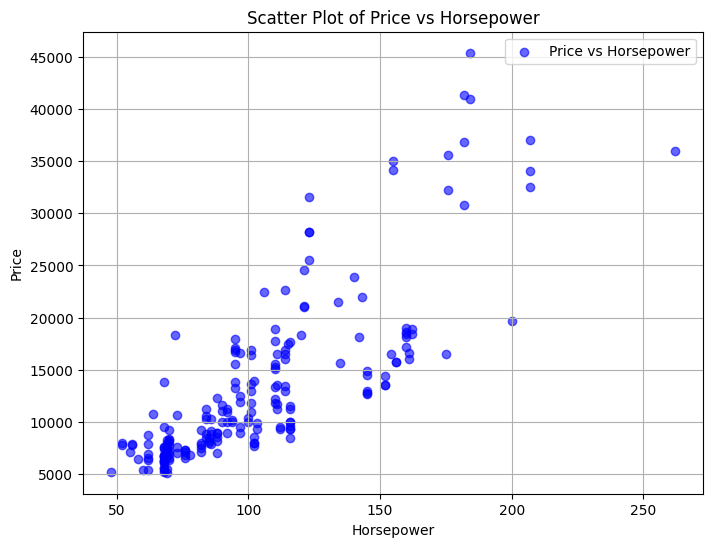

In [35]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(X, y, c='blue', label='Price vs Horsepower', alpha=0.6)
# Add labels and title  # This line was causing the error due to indentation
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Horsepower')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
# Fill missing values with mean for numeric columns only
numeric_columns = df.select_dtypes(include=np.number).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

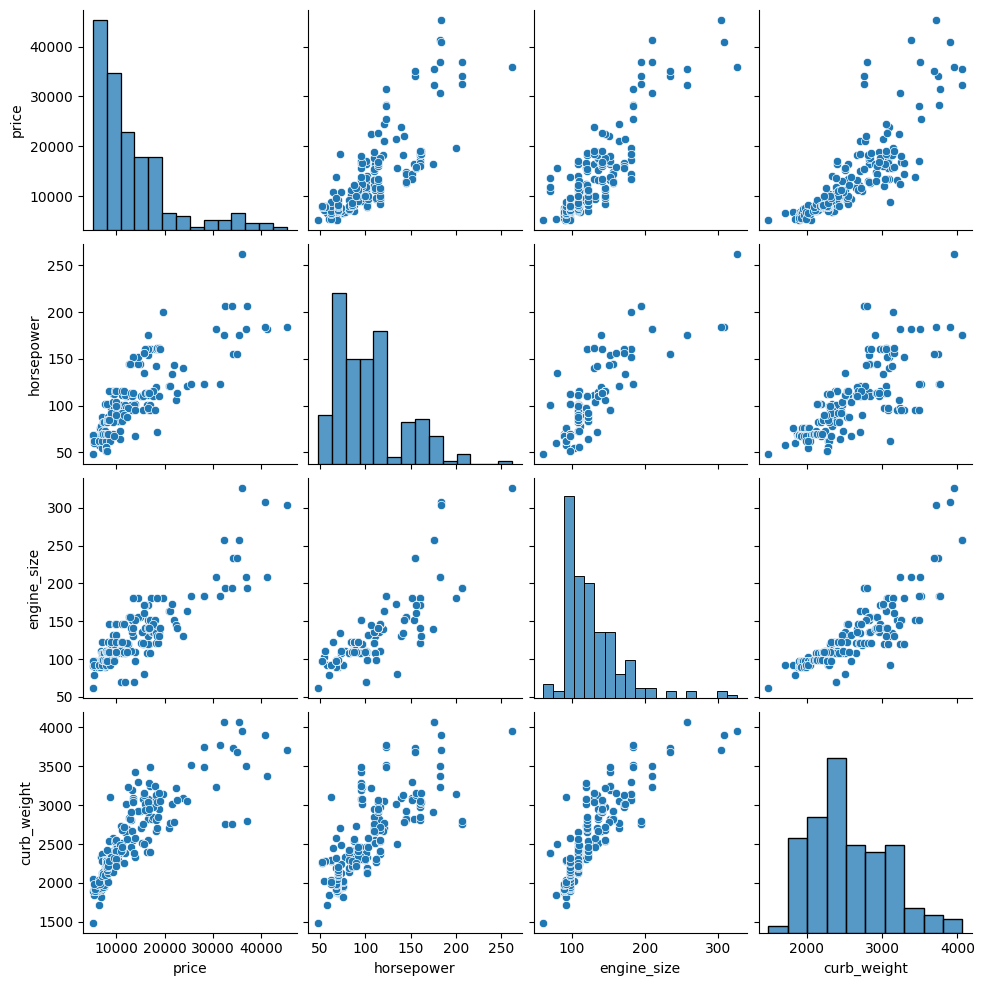

In [18]:
# Pairplot to visualize the relationships
sns.pairplot(df[['price', 'horsepower', 'engine_size', 'curb_weight']])
plt.show()

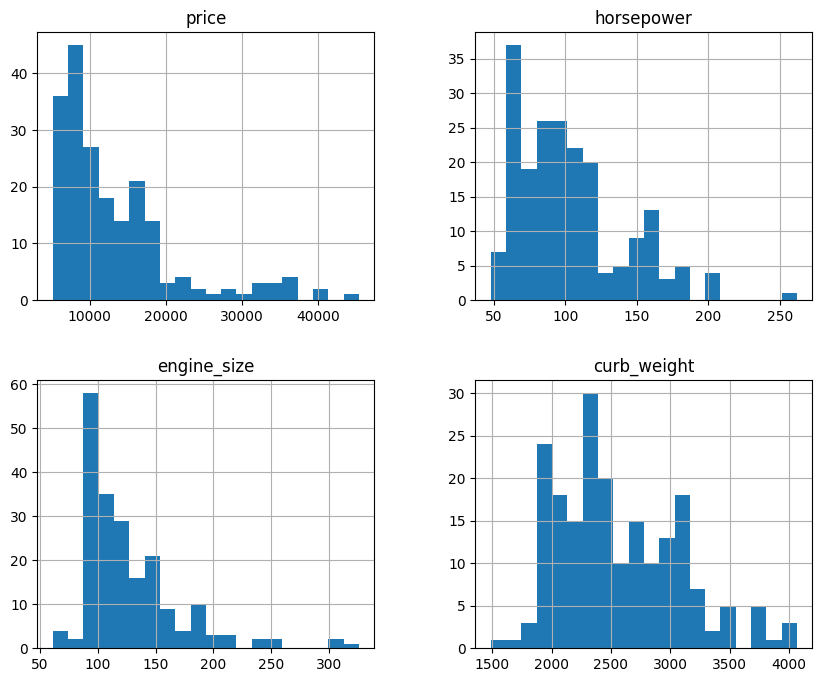

In [19]:
# Histograms
df[['price', 'horsepower', 'engine_size', 'curb_weight']].hist(bins=20, figsize=(10, 8))
plt.show()

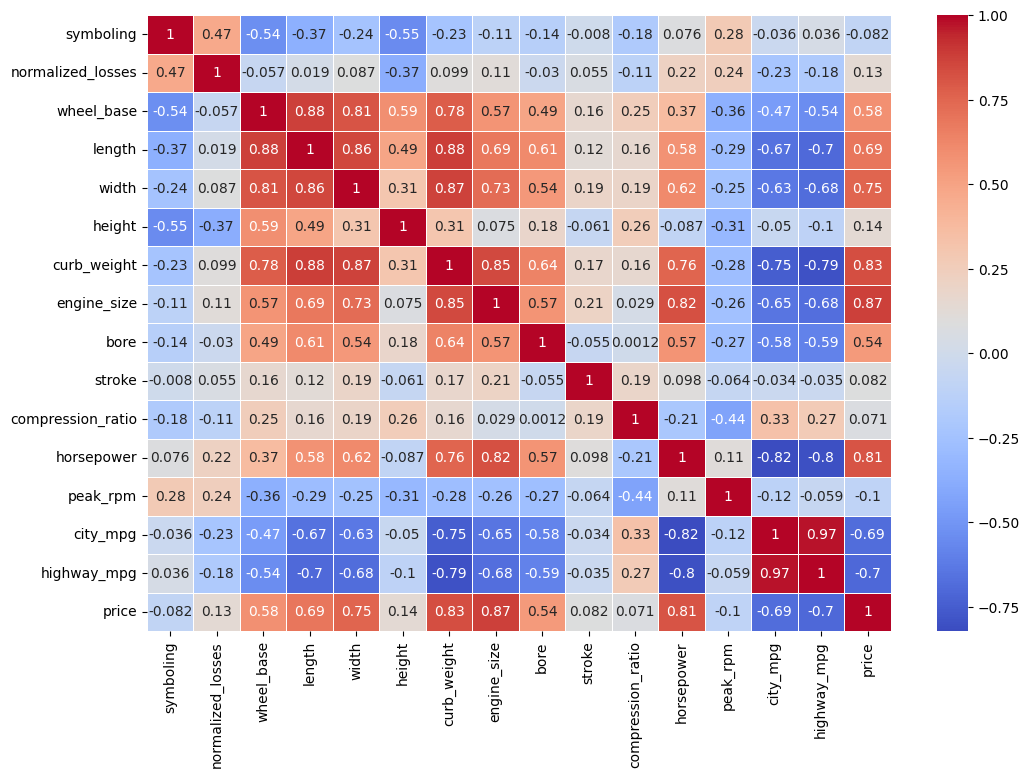

In [21]:
# Heatmap of correlations
plt.figure(figsize=(12, 8))
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [22]:
# Select features and target variable
X = df[['horsepower', 'engine_size', 'curb_weight']]
y = df['price']

In [23]:
# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [24]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

K-NN Regression Model

In [25]:
# k-NN regression model
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train, y_train)


KNeighborsRegressor()

In [26]:
# Predictions
y_pred = knn_regressor.predict(X_test)

In [27]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [28]:
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 41728395.7502439
R^2 Score: 0.6589334177041066


In [29]:
# Output the actual vs predicted values for inspection
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results.head())

      Actual  Predicted
98    8249.0     7112.8
16   41315.0    20091.2
31    6855.0     6049.6
162   9258.0     7792.2
132  11850.0    14543.0
